http://www.cs.toronto.edu/~tijmen/affNIST/

In [1]:
from lib import load_batch
b = load_batch(1)

Using TensorFlow backend.


In [2]:
b.image[0].shape

(40, 40)

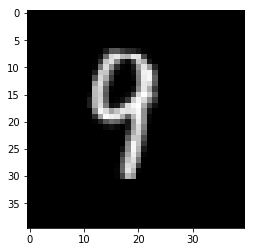

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.imshow(b.image[5], cmap='gray')

In [4]:
image = b.image.reshape(-1, 40, 40, 1)

In [5]:
from sklearn.model_selection import train_test_split

d = train_test_split(image, b.label_one_of_n, test_size=0.1, random_state=42)

In [ ]:
from keras.metrics import categorical_accuracy
import tensorflow
# _, test_x, _, test_y = d
test_x, _, test_y, _ = d
test_x, test_y = test_x[0:1000], test_y[0:1000]
pred_y = model.predict(test_x)
with tensorflow.Session():
    acc = categorical_accuracy(tensorflow.convert_to_tensor(test_y), tensorflow.convert_to_tensor(pred_y)).eval()
print(acc)

In [ ]:
print(test_y[3])
print(pred_y[3])

In [ ]:
from numpy import loadtxt
test = loadtxt("data/test-head.csv", skiprows=1, delimiter=',')

In [ ]:
test[4]

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.imshow(test[4, 1:].reshape(40, 40), cmap='gray')

In [ ]:
plt.imshow(b.image[3], cmap='gray')



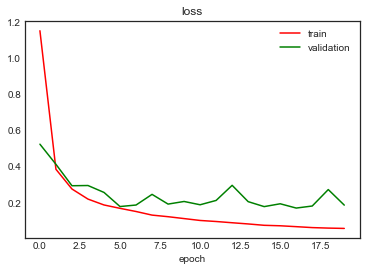

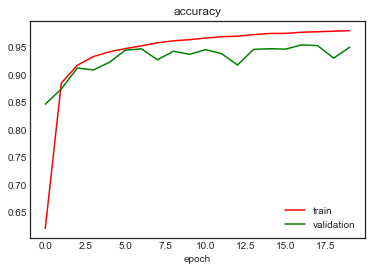

In [16]:
%matplotlib inline


import json
import numpy
from matplotlib import pyplot as plt
with open("my_hist.json") as f:
    hist = json.load(f)
plt.style.use('seaborn-white')
    
axis = numpy.arange(0, len(hist['val_categorical_accuracy']), 1)

plt.figure(1)
plt.title("loss")
plt.plot(axis, hist['loss'], 'r', label='train')
plt.plot(axis, hist['val_loss'], 'g', label='validation')
plt.xlabel("epoch")
plt.legend() # loc='lower center', bbox_to_anchor=(1, 0))


plt.figure(2)
plt.title("accuracy")
plt.plot(axis, hist['categorical_accuracy'], 'r', label='train')
plt.plot(axis, hist['val_categorical_accuracy'], 'g', label='validation')
plt.xlabel("epoch")
plt.legend()

In [19]:
print("Final validation loss:", hist["val_loss"][-1])
print("Final validation accuracy", hist["val_categorical_accuracy"][-1])

Final validation loss: 0.18771210621421536
Final validation accuracy 0.9501666666666667


In [21]:
from keras.models import load_model
model = load_model("my_model.h5")

In [37]:
print(model.flattened_layers[1])
print(model.flattened_layers[1].get_weights())

[array([[[[-0.15241632, -0.04934289,  0.05627509, -0.05436895,  0.05627773,
          -0.09272501,  0.14947943, -0.14444888,  0.09243173,  0.1725671 ,
           0.00821038,  0.00278508, -0.09516326, -0.02527392,  0.04824193,
          -0.15996987, -0.10427934, -0.15507339, -0.15803736, -0.11792654,
           0.06508675, -0.05782099,  0.0344962 , -0.06153077, -0.0684226 ,
           0.00802668,  0.08851564, -0.00157387, -0.12281759, -0.00968241,
          -0.16373548,  0.14136747]],

        [[ 0.04210076, -0.03169981,  0.05705142,  0.13490131, -0.08050344,
          -0.01728502, -0.0413308 , -0.09628927,  0.14493018, -0.06843895,
          -0.06647048, -0.01054623, -0.07848022,  0.01583945,  0.05114607,
          -0.0913893 , -0.16913325, -0.09622476, -0.08941191, -0.04983906,
          -0.17929602, -0.29408675, -0.01395699, -0.0951406 , -0.15282676,
           0.10296855,  0.10895778, -0.04472059, -0.04177972, -0.05508195,
           0.11839698,  0.14819416]],

        [[ 0.02661422

In [38]:
print(model.flattened_layers[2].get_weights())

[array([ 1.02442563,  0.9158867 ,  0.93692303,  0.95009553,  0.90699577,
        1.15838563,  0.91138625,  1.12195611,  1.07528853,  1.109496  ,
        1.02362692,  1.01122987,  1.03835785,  0.99327153,  0.9851343 ,
        1.05939579,  1.09746671,  1.06170785,  0.98825735,  0.93187004,
        1.08443904,  1.09075093,  1.04902983,  1.12692869,  1.0225997 ,
        0.9567675 ,  0.91877139,  1.10918856,  1.00689125,  1.15484166,
        1.01300919,  0.95643348], dtype=float32), array([-0.03342011, -0.10643148,  0.01201697, -0.07117904, -0.02880722,
        0.04090459,  0.07330729,  0.09798251, -0.08248681,  0.01835658,
       -0.1056069 , -0.09986825, -0.04816194, -0.09652454,  0.01197063,
        0.05823717,  0.03422413,  0.06919391,  0.01463911, -0.03259856,
        0.04662808,  0.10156353,  0.00742094,  0.12010285, -0.00465957,
       -0.11197477,  0.03059936, -0.00840615, -0.00888035,  0.13619831,
       -0.0225837 ,  0.06747484], dtype=float32), array([ 0.04988593, -0.07703254,  0

In [40]:
print(model.flattened_layers[3])
print(model.flattened_layers[3].get_weights())

[]


In [41]:
from keras.models import Sequential

In [64]:
new_model = Sequential()
for l in model.flattened_layers[:2]:
    new_model.add(l)
new_model.compile(loss='categorical_crossentropy', optimizer='sgd')

In [65]:
new_model.get_weights()

[array([ 0.9362784], dtype=float32),
 array([ 0.06459966], dtype=float32),
 array([ 16.14451027], dtype=float32),
 array([ 2905.48339844], dtype=float32),
 array([[[[-0.15241632, -0.04934289,  0.05627509, -0.05436895,  0.05627773,
           -0.09272501,  0.14947943, -0.14444888,  0.09243173,  0.1725671 ,
            0.00821038,  0.00278508, -0.09516326, -0.02527392,  0.04824193,
           -0.15996987, -0.10427934, -0.15507339, -0.15803736, -0.11792654,
            0.06508675, -0.05782099,  0.0344962 , -0.06153077, -0.0684226 ,
            0.00802668,  0.08851564, -0.00157387, -0.12281759, -0.00968241,
           -0.16373548,  0.14136747]],
 
         [[ 0.04210076, -0.03169981,  0.05705142,  0.13490131, -0.08050344,
           -0.01728502, -0.0413308 , -0.09628927,  0.14493018, -0.06843895,
           -0.06647048, -0.01054623, -0.07848022,  0.01583945,  0.05114607,
           -0.0913893 , -0.16913325, -0.09622476, -0.08941191, -0.04983906,
           -0.17929602, -0.29408675, -0.0139

In [66]:
out = new_model.predict(image[0:100])


In [61]:
image[1, :, :, 0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

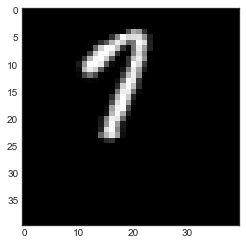

In [71]:
plt.imshow(image[2, :, :, 0], cmap='gray')


(100, 20, 20, 32)


/Users/michal/.virtualenvs/ml1617/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


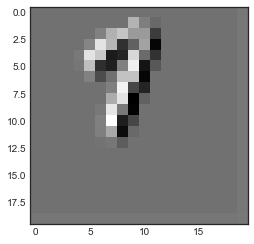

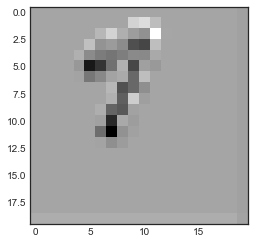

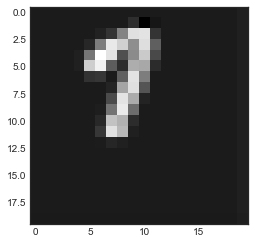

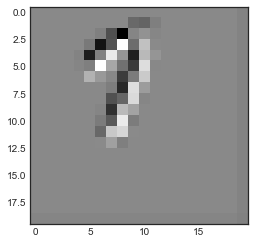

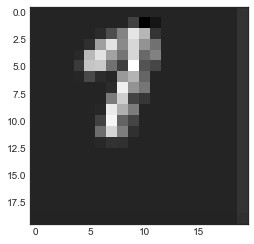

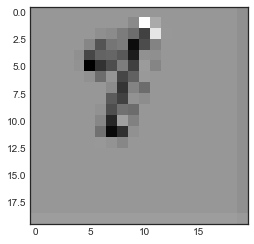

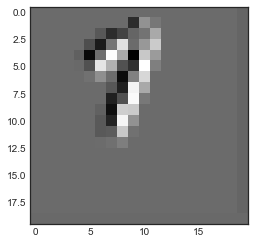

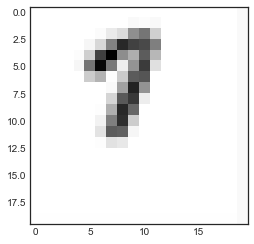

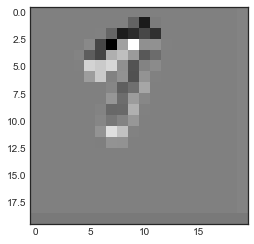

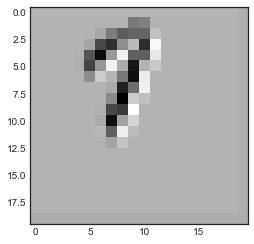

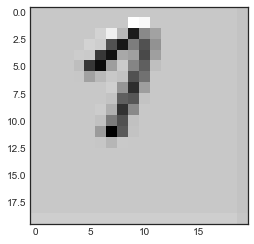

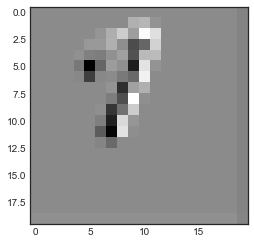

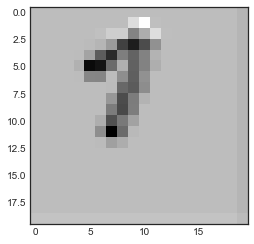

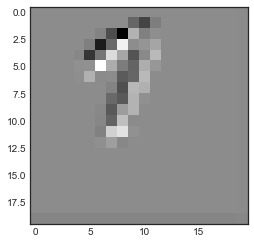

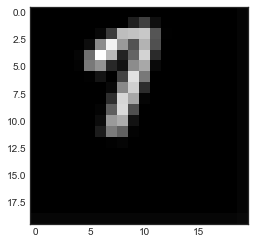

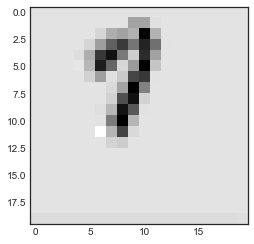

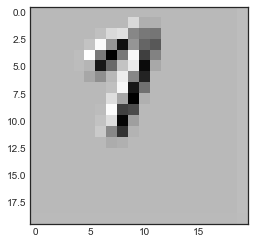

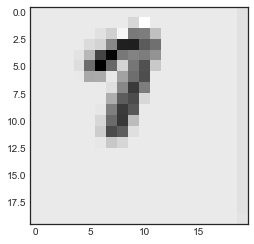

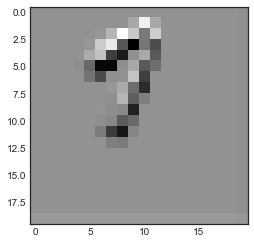

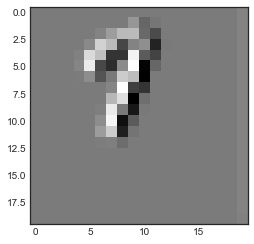

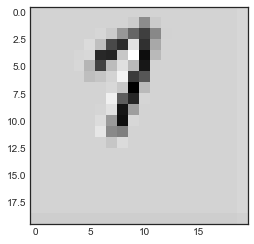

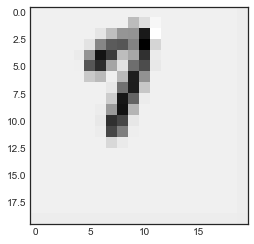

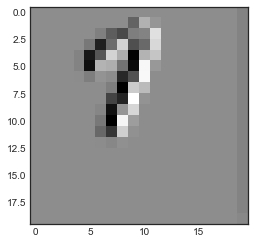

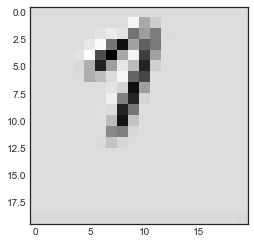

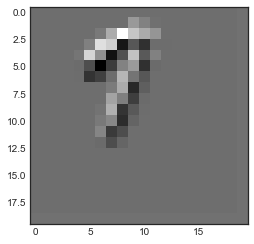

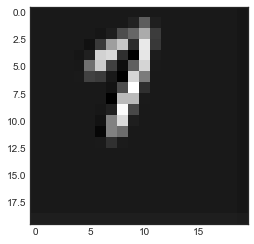

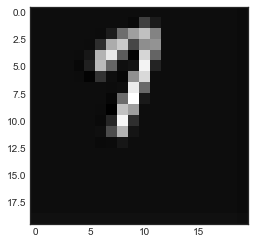

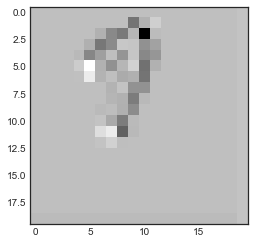

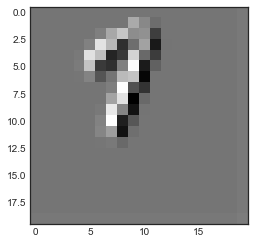

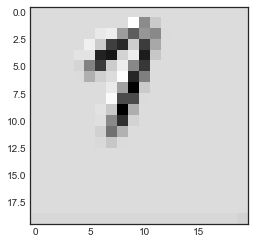

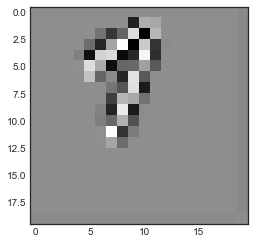

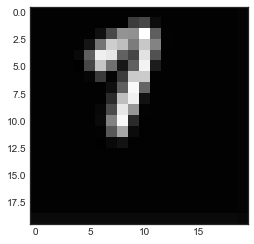

In [70]:
print(out.shape)
for t in range(0, out.shape[3]):
    plt.figure()
    plt.imshow(out[2, :, :, t], cmap='gray')